**So ,Basically we are trying here to builf a model which can forcast the user response(user rating) of upcoming smart phones and IPhone as we already seen in EDA that user rating properly not follwing any pattern beacuse they are subjective in nature.**  

# **Feature Engineering.**

In [0]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
pd.set_option('display.max_rows', None)

In [98]:
df= pd.read_csv('modify.csv')
data=df.copy()
data.head()

,Unnamed: 0,pid,score-val,name,price,rating,Brand,Processor(GHz),Processor,Core,RAM(GB),Memory(GB),Battery,Screen_size(inches),Display,Memory_card_supported,Android-v,Processor_brand,Front_cam_1,Front_cam_2,Dual Sim,3G,4G,VoLTE,Wi-Fi,IR Blaster,Single Sim,5G,NFC,HDMI,Quad Sim,Triple Sim,Quad_cam,Single_cam,Triple_cam,Dual_cam,Penta_cam
0,0,pd18nrbx50l,80,Xiaomi Redmi Note 9 Pro Max,9.711055,1.4,Xiaomi,2.3,Snapdragon 720G,Octa Core,6.0,64.0,8.521185,6.67,1080 x 2400 px Display with Punch Hole,512.0,Android v10.0,Snapdragon,32.0,0.0,1,1,1,1,1,1,0,0,0,0,0,0,64,0.0,0,0.0,0
1,1,pd1avaexqac,76,Xiaomi Redmi Note 9 Pro,9.546741,NaN,Xiaomi,2.3,Snapdragon 720G,Octa Core,4.0,64.0,8.521185,6.67,1080 x 2400 px Display with Punch Hole,512.0,Android v10.0,Snapdragon,16.0,0.0,1,1,1,1,1,1,0,0,0,0,0,0,48,0.0,0,0.0,0
2,2,pd1xq857m1x,74,Realme Narzo 10,9.392579,0.7,Realme,2.0,Helio G80,Octa Core,4.0,128.0,8.517193,6.50,720 x 1600 px Display with Water Drop Notch,256.0,Android v10,Helio,16.0,0.0,1,1,1,1,1,0,0,0,0,0,0,0,48,0.0,0,0.0,0
3,3,pd1sbe530da,80,Samsung Galaxy M31,9.680281,1.4,Samsung,2.3,Exynos 9611,Octa Core,6.0,64.0,8.699515,6.40,1080 x 2340 px Display with Water Drop Notch,512.0,Android v10.0,Exynos,32.0,0.0,1,1,1,1,1,0,0,0,0,0,0,0,64,0.0,0,0.0,0
4,4,pd1dj4jnzb4,76,Samsung Galaxy M21,9.449279,1.4,Samsung,2.3,Exynos 9611,Octa Core,4.0,64.0,8.699515,6.40,1080 x 2340 px Display with Water Drop Notch,512.0,Android v10.0,Exynos,20.0,0.0,1,1,1,1,1,0,0,0,0,0,0,0,0,0.0,48,0.0,0


**Some data type conversions.**

In [0]:
def handling_dtype(data):
	data['3G']=data['3G'].astype(str)
	data['4G']=data['4G'].astype(str)
	data['5G']=data['5G'].astype(str)
	data['VoLTE']=data['VoLTE'].astype(str)
	data['Wi-Fi']=data['Wi-Fi'].astype(str)
	data['IR Blaster']=data['IR Blaster'].astype(str)
	data['HDMI']=data['HDMI'].astype(str)
	data['Quad Sim']=data['Quad Sim'].astype(str)
	data['Triple Sim']=data['Triple Sim'].astype(str)
	data['Single Sim']=data['Single Sim'].astype(str)
	data['Dual Sim']=data['Dual Sim'].astype(str)
	data['NFC']=data['NFC'].astype(str)

	data['Front_cam_2'][data['Front_cam_2']=="[' 8  ', ' TOF 3D Dual Front Camera']"]=data['Front_cam_2'].mode()
	data['Front_cam_2']=data['Front_cam_2'].astype(float)

	data['Front_cam_1']=data['Front_cam_1'].astype(str)
	data['Front_cam_1']=data['Front_cam_1'].apply(lambda x:x.replace(' ','').replace("'",'').replace('[','').split(',')[0] if '[' in x else x )
	data['Front_cam_1']=data['Front_cam_1'].astype(float)
	data['Front_cam_1'].unique()

	data['Single_cam'][data['Single_cam']=='No']=data['Single_cam'].mode()
	data['Single_cam']=data['Single_cam'].astype(float)


In [0]:
handling_dtype(data)

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             2000 non-null   int64  
 1   pid                    2000 non-null   object 
 2   score-val              2000 non-null   int64  
 3   name                   2000 non-null   object 
 4   price                  2000 non-null   float64
 5   rating                 1675 non-null   float64
 6   Brand                  2000 non-null   object 
 7   Processor(GHz)         1532 non-null   float64
 8   Processor              1536 non-null   object 
 9   Core                   1536 non-null   object 
 10  RAM(GB)                1836 non-null   float64
 11  Memory(GB)             1897 non-null   float64
 12  Battery                1856 non-null   float64
 13  Screen_size(inches)    1906 non-null   float64
 14  Display                1906 non-null   object 
 15  Memo

In [102]:
data.head()

,Unnamed: 0,pid,score-val,name,price,rating,Brand,Processor(GHz),Processor,Core,RAM(GB),Memory(GB),Battery,Screen_size(inches),Display,Memory_card_supported,Android-v,Processor_brand,Front_cam_1,Front_cam_2,Dual Sim,3G,4G,VoLTE,Wi-Fi,IR Blaster,Single Sim,5G,NFC,HDMI,Quad Sim,Triple Sim,Quad_cam,Single_cam,Triple_cam,Dual_cam,Penta_cam
0,0,pd18nrbx50l,80,Xiaomi Redmi Note 9 Pro Max,9.711055,1.4,Xiaomi,2.3,Snapdragon 720G,Octa Core,6.0,64.0,8.521185,6.67,1080 x 2400 px Display with Punch Hole,512.0,Android v10.0,Snapdragon,32.0,0.0,1,1,1,1,1,1,0,0,0,0,0,0,64,0.0,0,0.0,0
1,1,pd1avaexqac,76,Xiaomi Redmi Note 9 Pro,9.546741,NaN,Xiaomi,2.3,Snapdragon 720G,Octa Core,4.0,64.0,8.521185,6.67,1080 x 2400 px Display with Punch Hole,512.0,Android v10.0,Snapdragon,16.0,0.0,1,1,1,1,1,1,0,0,0,0,0,0,48,0.0,0,0.0,0
2,2,pd1xq857m1x,74,Realme Narzo 10,9.392579,0.7,Realme,2.0,Helio G80,Octa Core,4.0,128.0,8.517193,6.50,720 x 1600 px Display with Water Drop Notch,256.0,Android v10,Helio,16.0,0.0,1,1,1,1,1,0,0,0,0,0,0,0,48,0.0,0,0.0,0
3,3,pd1sbe530da,80,Samsung Galaxy M31,9.680281,1.4,Samsung,2.3,Exynos 9611,Octa Core,6.0,64.0,8.699515,6.40,1080 x 2340 px Display with Water Drop Notch,512.0,Android v10.0,Exynos,32.0,0.0,1,1,1,1,1,0,0,0,0,0,0,0,64,0.0,0,0.0,0
4,4,pd1dj4jnzb4,76,Samsung Galaxy M21,9.449279,1.4,Samsung,2.3,Exynos 9611,Octa Core,4.0,64.0,8.699515,6.40,1080 x 2340 px Display with Water Drop Notch,512.0,Android v10.0,Exynos,20.0,0.0,1,1,1,1,1,0,0,0,0,0,0,0,0,0.0,48,0.0,0


**Dropping rows which have null rating value(beacuse it is our dependable varibale).**

In [103]:
#data.dropna(subset=['rating'],inplace=True)
data.dropna(subset=['rating'],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1675 entries, 0 to 1999
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1675 non-null   int64  
 1   pid                    1675 non-null   object 
 2   score-val              1675 non-null   int64  
 3   name                   1675 non-null   object 
 4   price                  1675 non-null   float64
 5   rating                 1675 non-null   float64
 6   Brand                  1675 non-null   object 
 7   Processor(GHz)         1289 non-null   float64
 8   Processor              1292 non-null   object 
 9   Core                   1292 non-null   object 
 10  RAM(GB)                1540 non-null   float64
 11  Memory(GB)             1589 non-null   float64
 12  Battery                1555 non-null   float64
 13  Screen_size(inches)    1595 non-null   float64
 14  Display                1592 non-null   object 
 15  Memo

In [0]:
features=[feature for feature in data.columns]

In [105]:
numeric_feature = [feature for feature in features if data[feature].dtypes!='O']
numeric_feature

['Unnamed: 0',
 'score-val',
 'price',
 'rating',
 'Processor(GHz)',
 'RAM(GB)',
 'Memory(GB)',
 'Battery',
 'Screen_size(inches)',
 'Memory_card_supported',
 'Front_cam_1',
 'Front_cam_2',
 'Quad_cam',
 'Single_cam',
 'Triple_cam',
 'Dual_cam',
 'Penta_cam']

In [106]:
categorical_features=[feature for feature in data.columns if data[feature].dtype =='O']
categorical_features= list(set(categorical_features)-set(['pid']))
categorical_features

['Processor',
 'IR Blaster',
 '3G',
 'Android-v',
 'Brand',
 'Core',
 'Processor_brand',
 'VoLTE',
 'Single Sim',
 'Dual Sim',
 'name',
 '5G',
 'Quad Sim',
 '4G',
 'NFC',
 'Wi-Fi',
 'Display',
 'Triple Sim',
 'HDMI']

**Handling missing values in both numerical as well as categorical features.**

In [107]:
for feature in numeric_feature:
  nan = data[feature].median()
  data[feature].fillna(nan, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1675 entries, 0 to 1999
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1675 non-null   int64  
 1   pid                    1675 non-null   object 
 2   score-val              1675 non-null   int64  
 3   name                   1675 non-null   object 
 4   price                  1675 non-null   float64
 5   rating                 1675 non-null   float64
 6   Brand                  1675 non-null   object 
 7   Processor(GHz)         1675 non-null   float64
 8   Processor              1292 non-null   object 
 9   Core                   1292 non-null   object 
 10  RAM(GB)                1675 non-null   float64
 11  Memory(GB)             1675 non-null   float64
 12  Battery                1675 non-null   float64
 13  Screen_size(inches)    1675 non-null   float64
 14  Display                1592 non-null   object 
 15  Memo

In [108]:
for feature in categorical_features:
  nan = data[feature].mode()[0]
  data[feature].fillna(nan, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1675 entries, 0 to 1999
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1675 non-null   int64  
 1   pid                    1675 non-null   object 
 2   score-val              1675 non-null   int64  
 3   name                   1675 non-null   object 
 4   price                  1675 non-null   float64
 5   rating                 1675 non-null   float64
 6   Brand                  1675 non-null   object 
 7   Processor(GHz)         1675 non-null   float64
 8   Processor              1675 non-null   object 
 9   Core                   1675 non-null   object 
 10  RAM(GB)                1675 non-null   float64
 11  Memory(GB)             1675 non-null   float64
 12  Battery                1675 non-null   float64
 13  Screen_size(inches)    1675 non-null   float64
 14  Display                1675 non-null   object 
 15  Memo

**Handling Categorical features as it requires to convert into some form before feeding into the model as i'm going for simply converting into numerical variable instead of converting into one hot encdoing or using label encoder library.**

In [109]:
for feature in categorical_features:
    labels_ordered=data.groupby([feature])['price'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    data[feature]=data[feature].map(labels_ordered)
    
data.head()

,Unnamed: 0,pid,score-val,name,price,rating,Brand,Processor(GHz),Processor,Core,RAM(GB),Memory(GB),Battery,Screen_size(inches),Display,Memory_card_supported,Android-v,Processor_brand,Front_cam_1,Front_cam_2,Dual Sim,3G,4G,VoLTE,Wi-Fi,IR Blaster,Single Sim,5G,NFC,HDMI,Quad Sim,Triple Sim,Quad_cam,Single_cam,Triple_cam,Dual_cam,Penta_cam
0,0,pd18nrbx50l,80,994,9.711055,1.4,139,2.3,200,3,6.0,64.0,8.521185,6.67,137,512.0,31,15,32.0,0.0,0,1,1,1,1,1,0,0,0,0,0,1,64,0.0,0,0.0,0
2,2,pd1xq857m1x,74,802,9.392579,0.7,129,2.0,135,3,4.0,128.0,8.517193,6.50,94,256.0,29,23,16.0,0.0,0,1,1,1,1,0,0,0,0,0,0,1,48,0.0,0,0.0,0
3,3,pd1sbe530da,80,980,9.680281,1.4,148,2.3,186,3,6.0,64.0,8.699515,6.40,71,512.0,31,34,32.0,0.0,0,1,1,1,1,0,0,0,0,0,0,1,64,0.0,0,0.0,0
4,4,pd1dj4jnzb4,76,816,9.449279,1.4,148,2.3,186,3,4.0,64.0,8.699515,6.40,71,512.0,31,34,20.0,0.0,0,1,1,1,1,0,0,0,0,0,0,1,0,0.0,48,0.0,0
5,5,pd1f4dycqja,58,270,8.160232,1.0,129,2.0,0,3,3.0,32.0,8.294050,6.10,39,128.0,12,23,5.0,0.0,0,1,1,1,1,0,0,0,0,0,0,1,0,0.0,0,13.0,0


In [110]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Unnamed: 0,pid,score-val,name,price,rating,Brand,Processor(GHz),Processor,Core,RAM(GB),Memory(GB),Battery,Screen_size(inches),Display,Memory_card_supported,Android-v,Processor_brand,Front_cam_1,Front_cam_2,Dual Sim,3G,4G,VoLTE,Wi-Fi,IR Blaster,Single Sim,5G,NFC,HDMI,Quad Sim,Triple Sim,Quad_cam,Single_cam,Triple_cam,Dual_cam,Penta_cam
0,1637,pd1gfpfnrmt,13,175,7.105786,1.55,68,2.20,0,3,32.0,32.0,7.824046,2.40,21,8.0,12,15,13.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.1,0,0.0,0
1,1100,1101n8zmob0,48,376,8.612322,1.50,134,1.10,18,1,1.0,16.0,7.762171,5.00,40,32.0,10,23,2.0,0.0,0,1,1,1,1,0,0,0,0,0,0,1,0,5.0,0,0.0,0
2,1793,pd13u01h256,82,1580,11.082127,1.45,137,2.80,293,3,8.0,256.0,8.294050,6.42,143,256.0,12,15,32.0,0.0,0,1,1,1,1,0,0,0,1,0,0,1,0,0.0,48,0.0,0
3,842,pd1t8hjfld8,85,1335,10.373460,1.20,144,2.30,254,3,6.0,128.0,8.411833,6.53,138,256.0,31,15,16.0,0.0,0,1,1,1,1,0,0,1,1,0,0,1,64,0.0,0,0.0,0
4,734,pd1yujbpkrb,85,1629,11.314462,1.60,148,2.84,291,3,8.0,512.0,8.351139,7.30,188,16.0,12,15,13.0,0.0,1,1,1,1,1,0,1,0,1,0,0,1,0,13.0,0,0.0,0


In [0]:
train_data=data[:1500]
test_data=data[1500:]

In [114]:
train_data.drop(['pid','name','Unnamed: 0'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [115]:
orig_df=data[['pid','rating']][1500:]
orig_df.head()

,pid,rating
1500,pd18ue86cjy,1.25
1501,pd109ecaw6g,1.20
1502,pd15sysns8m,1.35
1503,pd1ymrfsjs3,1.05
1504,pd1euj7xbif,1.25


# **Feature Scaling**

In [0]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [117]:
feature_scale=[feature for feature in train_data.columns ]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train_data[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [118]:
train_data = pd.DataFrame(scaler.transform(train_data[feature_scale]), columns=feature_scale)
train_data.head()

,score-val,price,rating,Brand,Processor(GHz),Processor,Core,RAM(GB),Memory(GB),Battery,Screen_size(inches),Display,Memory_card_supported,Android-v,Processor_brand,Front_cam_1,Front_cam_2,Dual Sim,3G,4G,VoLTE,Wi-Fi,IR Blaster,Single Sim,5G,NFC,HDMI,Quad Sim,Triple Sim,Quad_cam,Single_cam,Triple_cam,Dual_cam,Penta_cam
0,0.077778,0.285640,0.775,0.397661,0.612245,0.000000,0.6,0.492063,0.048513,0.445452,0.272727,0.101942,0.013699,0.292683,0.365854,0.294332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000926,0.000000,0.0,0.0
1,0.466667,0.457040,0.750,0.783626,0.051020,0.058252,0.2,0.000000,0.023474,0.428070,0.610390,0.194175,0.060665,0.243902,0.560976,0.043934,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.046296,0.000000,0.0,0.0
2,0.844444,0.738031,0.725,0.801170,0.918367,0.948220,0.6,0.111111,0.399061,0.577483,0.794805,0.694175,0.499022,0.292683,0.365854,0.726838,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.444444,0.0,0.0
3,0.877778,0.657406,0.600,0.842105,0.663265,0.822006,0.6,0.079365,0.198748,0.610570,0.809091,0.669903,0.499022,0.756098,0.365854,0.362622,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.592593,0.000000,0.000000,0.0,0.0
4,0.877778,0.764464,0.800,0.865497,0.938776,0.941748,0.6,0.111111,0.799687,0.593520,0.909091,0.912621,0.029354,0.292683,0.365854,0.294332,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.120370,0.000000,0.0,0.0


In [119]:
train_data.corr()

,score-val,price,rating,Brand,Processor(GHz),Processor,Core,RAM(GB),Memory(GB),Battery,Screen_size(inches),Display,Memory_card_supported,Android-v,Processor_brand,Front_cam_1,Front_cam_2,Dual Sim,3G,4G,VoLTE,Wi-Fi,IR Blaster,Single Sim,5G,NFC,HDMI,Quad Sim,Triple Sim,Quad_cam,Single_cam,Triple_cam,Dual_cam,Penta_cam
score-val,1.000000,0.916378,0.050890,0.810918,0.315063,0.816376,0.098635,-0.395027,0.355199,0.636811,0.776480,0.769802,0.242593,0.389570,0.324385,0.379038,0.181106,-0.107614,0.831302,0.844702,0.700276,0.845349,0.190961,-0.073471,0.353708,0.470066,0.000110,-0.052690,0.096593,0.367902,-0.181608,0.344378,0.205256,0.069225
price,0.916378,1.000000,0.060304,0.847113,0.375130,0.858862,0.133867,-0.352161,0.423663,0.536185,0.683607,0.813709,0.215172,0.394940,0.340240,0.314941,0.160859,0.047180,0.745691,0.749627,0.603703,0.763164,0.154555,0.075208,0.349334,0.554819,0.018188,-0.028407,0.074342,0.277450,-0.118080,0.323310,0.181313,0.064760
rating,0.050890,0.060304,1.000000,0.006176,0.109898,0.074430,0.038359,0.025138,0.046276,0.008659,0.016941,0.067547,-0.007035,0.011467,-0.011327,0.038376,0.022031,0.001048,0.020838,0.023798,0.021857,0.012099,-0.010720,-0.005974,0.044156,0.051274,-0.032092,0.007289,-0.012000,0.037233,-0.047701,0.009386,0.034132,-0.002687
Brand,0.810918,0.847113,0.006176,1.000000,0.197961,0.727990,0.078734,-0.404436,0.260118,0.496878,0.639113,0.691265,0.315833,0.378449,0.395285,0.230561,0.088796,0.063023,0.702352,0.698713,0.589679,0.732412,0.143072,0.095640,0.213775,0.418623,0.026074,-0.034879,0.092205,0.215512,-0.109341,0.259005,0.186252,0.032852
Processor(GHz),0.315063,0.375130,0.109898,0.197961,1.000000,0.541811,0.419124,0.170375,0.515938,0.149763,0.167443,0.447488,0.144818,0.181773,0.080075,0.397465,0.160794,0.048309,-0.033171,-0.000865,0.087763,-0.033714,0.138412,0.048827,0.370840,0.472480,-0.062203,0.002106,-0.004216,0.209436,-0.166752,0.307533,0.062941,0.024792
Processor,0.816376,0.858862,0.074430,0.727990,0.541811,1.000000,0.246261,-0.156916,0.499275,0.465361,0.559596,0.794717,0.299498,0.393692,0.326944,0.466374,0.201037,0.045610,0.512066,0.546871,0.506243,0.520443,0.190634,0.076491,0.393993,0.593539,0.005242,-0.032511,0.065086,0.336847,-0.155305,0.360133,0.187422,0.068198
Core,0.098635,0.133867,0.038359,0.078734,0.419124,0.246261,1.000000,0.126106,0.249339,0.048297,0.024287,0.228014,0.130400,0.131532,0.090266,0.222354,0.051535,0.025033,-0.102254,-0.076323,0.021729,-0.103927,0.058469,0.020543,0.080962,0.183633,0.031962,0.006492,-0.012997,0.096538,-0.089868,0.091684,0.035358,0.015514
RAM(GB),-0.395027,-0.352161,0.025138,-0.404436,0.170375,-0.156916,0.126106,1.000000,0.057266,-0.516677,-0.538436,-0.284279,-0.100749,-0.095057,-0.152043,0.110461,-0.002198,-0.038076,-0.525897,-0.519219,-0.366296,-0.570246,-0.018965,-0.062482,0.022513,-0.051817,-0.024426,-0.008173,-0.101899,-0.005436,-0.148116,-0.015788,-0.100820,0.003009
Memory(GB),0.355199,0.423663,0.046276,0.260118,0.515938,0.499275,0.249339,0.057266,1.000000,0.246273,0.291981,0.424684,0.115258,0.179548,0.101754,0.385297,0.134590,0.091038,0.036330,0.073166,0.130880,0.064634,0.137733,0.073179,0.333916,0.375645,-0.039089,-0.007350,-0.012098,0.237516,-0.036466,0.260670,0.010856,0.098043
Battery,0.636811,0.536185,0.008659,0.496878,0.149763,0.465361,0.048297,-0.516677,0.246273,1.000000,0.726717,0.514695,0.254695,0.255719,0.168840,0.275378,0.100220,-0.153595,0.471507,0.544412,0.454130,0.500373,0.120076,-0.161180,0.194656,0.187601,-0.034651,0.007474,0.011065,0.254513,0.006035,0.211734,0.158620,0.060831


**Visulaizing correlation Matrix**

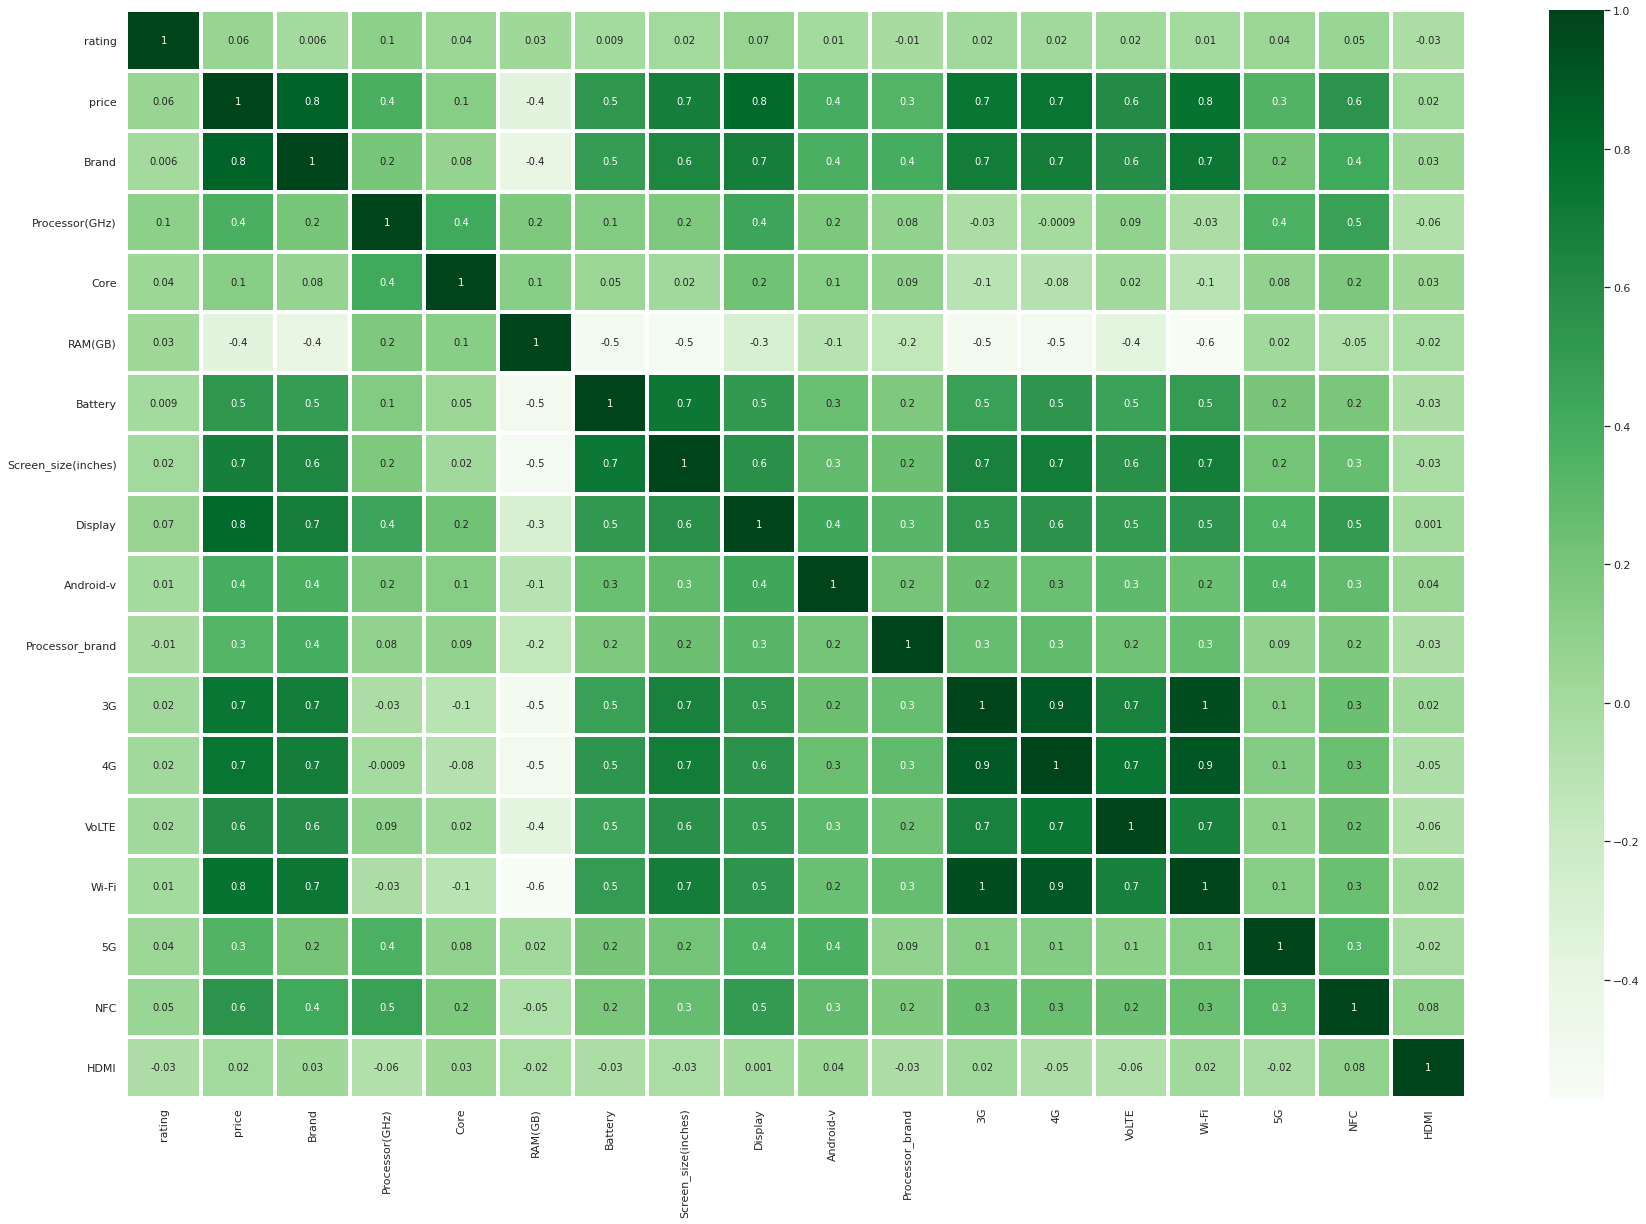

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'lightgrey'})
%matplotlib inline 

plt.figure(figsize=(30,20))
cmap = sns.cm.rocket_r
sns.heatmap(train_data[['rating','price','Brand', 'Processor(GHz)', 'Core', 'RAM(GB)', 'Battery', 'Screen_size(inches)',
       'Display', 'Android-v', 'Processor_brand', '3G', '4G', 'VoLTE', 'Wi-Fi', '5G', 'NFC', 'HDMI']].corr(), annot=True , linewidths=3 , fmt='.1g' , cmap="Greens" )
plt.show()

In [0]:
train_data_f = train_data.drop(['rating'],axis=1)
Ratings = train_data['rating']

**Creating Train and validation dataset**

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data_f,Ratings,test_size=.05)

In [123]:
# lasso
feature_sel_model = SelectFromModel(Lasso(alpha=0.000, random_state=0)) 
feature_sel_model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_from_model.py:222: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.867894207310714, tolerance: 0.002227899824561405
  positive)


SelectFromModel(estimator=Lasso(alpha=0.0, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [124]:
feature_sel_model.get_support()


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [125]:
selected_feat = x_train.columns[(feature_sel_model.get_support())]
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 33
selected features: 33


**Selected features**

In [126]:
selected_feat

Index(['score-val', 'price', 'Brand', 'Processor(GHz)', 'Processor', 'Core',
       'RAM(GB)', 'Memory(GB)', 'Battery', 'Screen_size(inches)', 'Display',
       'Memory_card_supported', 'Android-v', 'Processor_brand', 'Front_cam_1',
       'Front_cam_2', 'Dual Sim', '3G', '4G', 'VoLTE', 'Wi-Fi', 'IR Blaster',
       'Single Sim', '5G', 'NFC', 'HDMI', 'Quad Sim', 'Triple Sim', 'Quad_cam',
       'Single_cam', 'Triple_cam', 'Dual_cam', 'Penta_cam'],
      dtype='object')

**Using the same selected feature in test dataset also**

In [0]:
x_train=x_train[selected_feat]
x_test  =x_test[selected_feat]

# **Model selection**

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score as cvs

**Linear Regression model**

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:

Linear_model = LinearRegression()
Linear_model.fit(x_train, y_train)
y_predict=Linear_model.predict(x_test)

In [132]:
abs(y_predict-y_test).mean()

0.10077217048399752

**Ploting Distribution of predicted vs Expected results.**

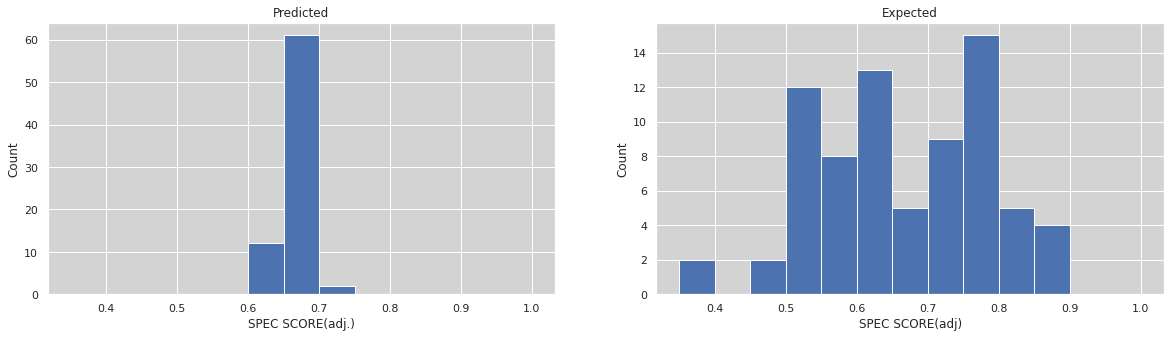

In [133]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
ax1.hist(y_predict , bins=[0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1])
ax2.hist(y_test , bins=[0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1])
ax1.set_title('Predicted')
ax2.set_title('Expected')
ax1.set_xlabel('SPEC SCORE(adj.)')
ax2.set_xlabel('SPEC SCORE(adj)')
ax1.set_ylabel('Count')
ax2.set_ylabel('Count')
plt.show()

**Random forest** 

In [0]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
regressor.fit(x_train,y_train)   
RFR_pred = regressor.predict(x_test)

In [135]:
abs(RFR_pred-y_test).mean()

0.10410333333333331

**Hyper parameter tuning for random forest.**

In [0]:
from sklearn.model_selection import GridSearchCV
clf =GridSearchCV(RandomForestRegressor(random_state = 0) ,{
    'n_estimators':[200,100,50]
}, scoring='neg_mean_squared_error',cv=2,return_train_score=False)



clf.fit(x_train,y_train)   
RFR_pred_grid = clf.predict(x_test)

In [137]:
output = pd.DataFrame(clf.cv_results_)
output

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,1.214528,0.020908,0.030747,0.000146,200,{'n_estimators': 200},-0.016756,-0.018157,-0.017456,0.000700,1
1,0.600781,0.004686,0.016818,0.000756,100,{'n_estimators': 100},-0.016826,-0.018287,-0.017557,0.000730,2
2,0.298578,0.001135,0.008877,0.000032,50,{'n_estimators': 50},-0.017117,-0.018481,-0.017799,0.000682,3


**MAE**

In [138]:
abs(RFR_pred_grid-y_test).mean()

0.10503027777777786

**Expected MAE when model is not doing fine.**

In [139]:
abs(y_test.mean()-y_test).mean()

0.09883555555555552

**Both are pretty close this means model is not working well.**

**Ploting Distribution of predicted vs Expected on validation datset.** 

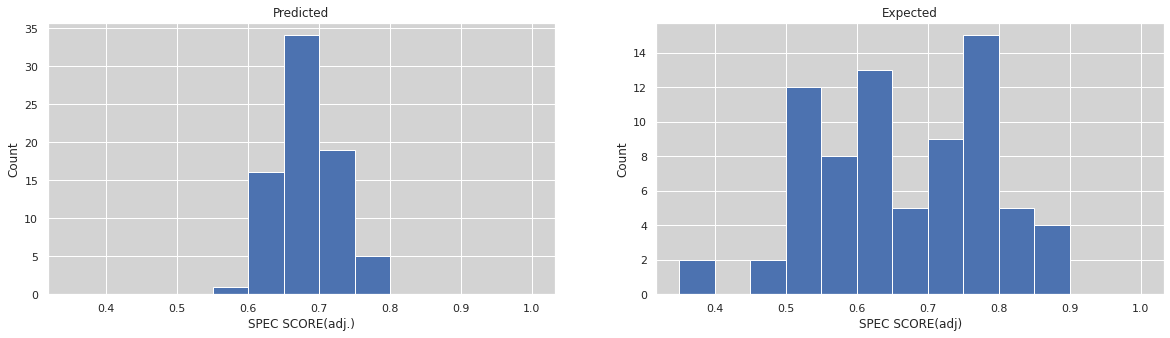

In [140]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
ax1.hist(RFR_pred_grid , bins=[0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1])
ax2.hist(y_test , bins=[0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1])
ax1.set_title('Predicted')
ax2.set_title('Expected')
ax1.set_xlabel('SPEC SCORE(adj.)')
ax2.set_xlabel('SPEC SCORE(adj)')
ax1.set_ylabel('Count')
ax2.set_ylabel('Count')
plt.show()

**Distribution Graphs are also not similar**

**XGB boost**

In [141]:
from xgboost import XGBRegressor
xgb_model=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.02,
             eval_metric='mae', gamma=0, importance_type='gain',
             learning_rate=0.05, max_delta_step=0, max_depth=10,
             min_child_weight=3, missing=None, n_estimators=200, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)

eval_set = [(x_train, y_train), (x_test, y_test)]
xgb_model.fit(x_train,y_train , eval_set=eval_set ,verbose=False , eval_metric='mae' )

[05:47:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.02,
             eval_metric='mae', gamma=0, importance_type='gain',
             learning_rate=0.05, max_delta_step=0, max_depth=10,
             min_child_weight=3, missing=None, n_estimators=200, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)

In [0]:
y=xgb_model.predict(x_train)

In [143]:
abs(y-y_train).mean()

0.026859994206512233

In [0]:
y_predict=xgb_model.predict(x_test)

**MAE on validation set**

In [145]:
abs(y_predict-y_test).mean()

0.11172593434651693

**Both are pretty close this means model is not working well.**

**predicted result on trained data vs actual result on trained data.** 

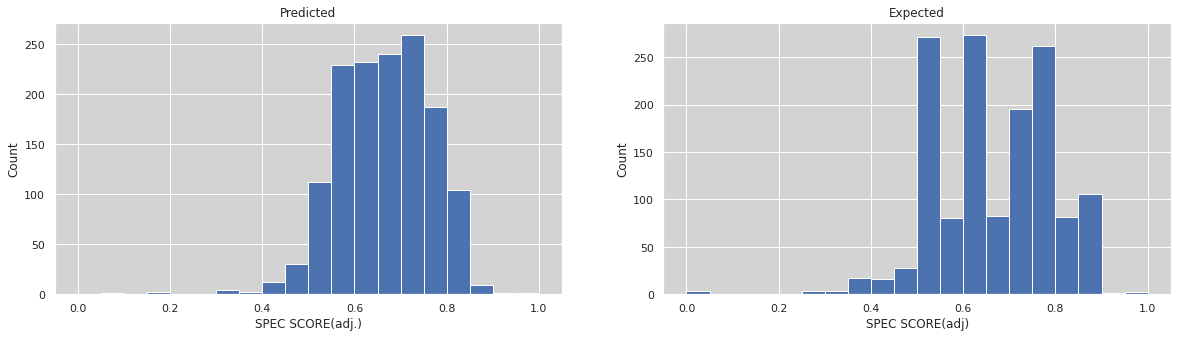

In [146]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
ax1.hist(y , bins=[0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1])
ax2.hist(y_train , bins=[0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1])
ax1.set_title('Predicted')
ax2.set_title('Expected')
ax1.set_xlabel('SPEC SCORE(adj.)')
ax2.set_xlabel('SPEC SCORE(adj)')
ax1.set_ylabel('Count')
ax2.set_ylabel('Count')
plt.show()

**predicted result on test data vs actual result on test data.** 

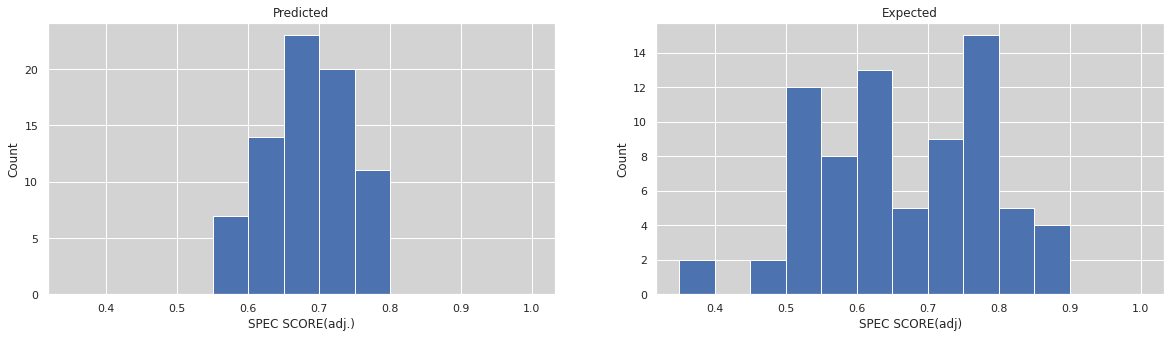

In [147]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
ax1.hist(y_predict , bins=[0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1])
ax2.hist(y_test , bins=[0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1])
ax1.set_title('Predicted')
ax2.set_title('Expected')
ax1.set_xlabel('SPEC SCORE(adj.)')
ax2.set_xlabel('SPEC SCORE(adj)')
ax1.set_ylabel('Count')
ax2.set_ylabel('Count')
plt.show()

In [0]:
from matplotlib import pyplot

**Plotting learning curve.**

In [0]:
results = xgb_model.evals_result()
epochs = len(results['validation_0']['mae'])
x_axis = range(0, epochs)

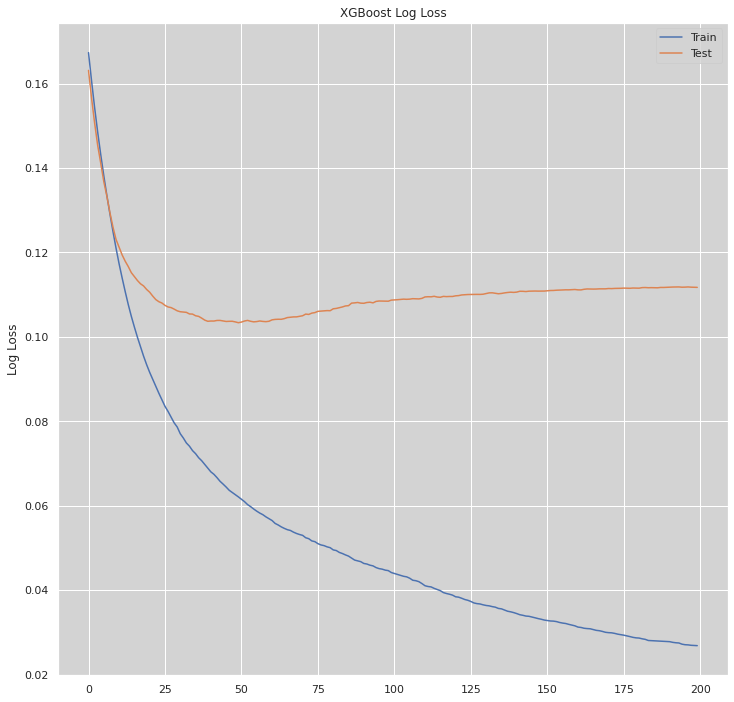

In [150]:
fig, ax = pyplot.subplots(figsize=(12,12))
ax.plot(x_axis, results['validation_0']['mae'], label='Train')
ax.plot(x_axis, results['validation_1']['mae'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

**Hyper parameter tuning XGBboost**

In [0]:
params={
 "learning_rate"    :[0.05],
 'eta'              :[0.02],
 "max_depth"        :[ 10, 20],
  "n_estimators"    :[100, 200],
  "early_stopping_rounds":[10], 
  "eval_metric" : ["mae"], 
  "eval_set" : [[x_test, y_test]],
  'min_child_weight':[3]
}

In [0]:
classifier = XGBRegressor()

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
xgb_clf=GridSearchCV(classifier, params, verbose=1,             
         cv=TimeSeriesSplit(n_splits=5).get_n_splits([x_train, y_train]))

**Preparing TEST dataset for testing.**

In [154]:
test_data.drop(['Unnamed: 0','name','pid'],inplace=True,axis=1)
test_data = pd.DataFrame(scaler.transform(test_data[feature_scale]), columns=feature_scale)
test_data_f = test_data.drop(['rating'],axis=1)
test_data = test_data[selected_feat]



/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
test_data_f=test_data_f[selected_feat]

In [0]:
xgb_clf.fit(x_train,y_train)   

In [157]:
xgb_clf.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=10,
             eta=0.02, eval_metric='mae',
             eval_set=[      score-val     price     Brand  ...  Triple_cam  Dual_cam  Penta_cam
621    0.666667  0.591887  0.918129  ...    0.000000  0.203125        0.0
295    0.444444  0.391094  0.380117  ...    0.000000  0.000000        0.0
223    0.788889  0.682794  0.935673  ...    0.000000...
12      0.550
726     0.550
80      0.700
1483    0.700
93      0.825
1490    0.675
Name: rating, dtype: float64],
             gamma=0, importance_type='gain', learning_rate=0.05,
             max_delta_step=0, max_depth=10, min_child_weight=3, missing=None,
             n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [0]:
y_predict =xgb_clf.predict(x_train)

In [0]:
y_predict_test =  xgb_clf.predict(x_test)

In [160]:
abs(y_predict_test-y_test).mean()

0.1087064909934997

In [0]:
y_predict_best =  xgb_clf.predict(test_data_f)

In [162]:
r=data['rating'][:1500].max()-data['rating'][:1500].min()
r

2.0

In [167]:
abs(y_predict_best-(data['rating'][1500:])/r).mean()

0.11517137598991399

In [168]:
abs(y_test.mean()-y_test).mean()

0.09883555555555552

**predicted result on test data(validation dataset) vs actual result on validation dataset) vs actual result on trained data.**

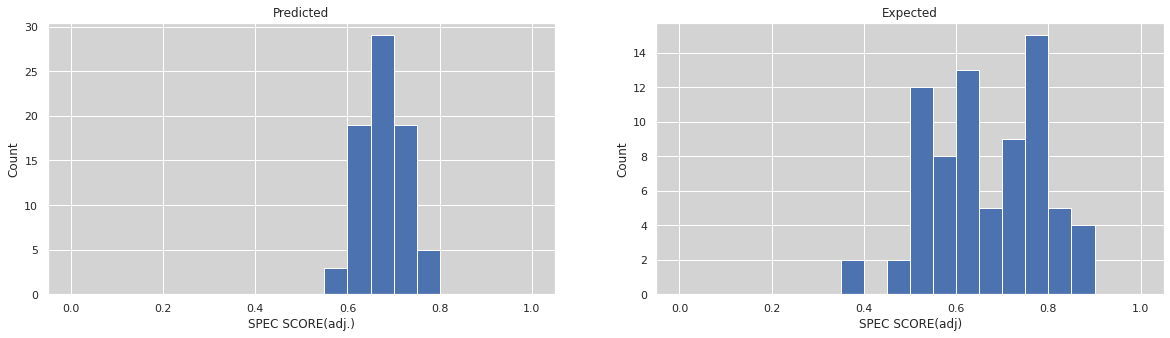

In [169]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
ax1.hist(y_predict_test , bins=[0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1])
ax2.hist(y_test , bins=[0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1])
ax1.set_title('Predicted')
ax2.set_title('Expected')
ax1.set_xlabel('SPEC SCORE(adj.)')
ax2.set_xlabel('SPEC SCORE(adj)')
ax1.set_ylabel('Count')
ax2.set_ylabel('Count')
plt.show()

**predicted result on seperate test data vs actual result on test data.**

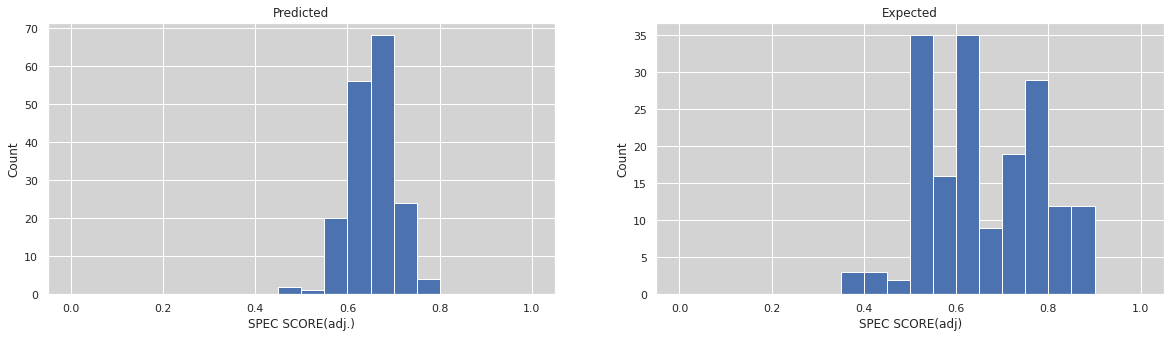

In [184]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
ax1.hist(y_predict_best , bins=[0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1])
ax2.hist( (data['rating'][1500:]-data['rating'][:1500].min())/r, bins=[0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1])
ax1.set_title('Predicted')
ax2.set_title('Expected')
ax1.set_xlabel('SPEC SCORE(adj.)')
ax2.set_xlabel('SPEC SCORE(adj)')
ax1.set_ylabel('Count')
ax2.set_ylabel('Count')
plt.show()

In [0]:
y_predict = y_predict_best

**Rescaling to original data .**

In [175]:
y_predict = y_predict*(r)
y_predict[:5]

array([1.4392546, 1.3836085, 1.1792946, 1.2396756, 1.3330324],
      dtype=float32)

In [180]:
orig_df['predict']=y_predict+3
orig_df['rating']=orig_df['rating']+3
orig_df.head()

,pid,rating,predict
1500,pd18ue86cjy,4.25,4.439255
1501,pd109ecaw6g,4.20,4.383608
1502,pd15sysns8m,4.35,4.179295
1503,pd1ymrfsjs3,4.05,4.239676
1504,pd1euj7xbif,4.25,4.333033


**Checking whether our prediction is higly correleted with result or not.**

In [181]:
orig_df[['predict','rating']].corr()

,predict,rating
predict,1.000000,-0.090646
rating,-0.090646,1.000000


**Expected error if our model is not working**

In [182]:
diff_error=(abs(orig_df['rating']-orig_df['rating'].mean())).mean()
diff_error

0.20959020408163262

In [183]:
abs(orig_df['rating']-orig_df['predict']).mean()

0.23034276798793257

**Our results show with predicting subjective is much tough as compared to objetive behaviour our model doesn't able to find any mapping**